In [1]:
import numpy as np
import pandas as pd

In [2]:
spam = pd.read_csv(r'D:\5th SEM\ML Project\SPAM\spam.csv',
                  engine='python',
                  encoding='latin1')

In [3]:
spam.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1599,ham,"Yeah probably, I still gotta check out with leo",NaN,NaN,NaN
4618,ham,"Sorry, I'll call later In meeting.",NaN,NaN,NaN
1540,ham,K come to nordstrom when you're done,NaN,NaN,NaN
2856,ham,Today i'm not workin but not free oso... Gee.....,NaN,NaN,NaN
4622,ham,U need my presnts always bcz U cant mis love. ...,NaN,NaN,NaN


In [4]:
spam.shape

(5572, 5)

In [5]:
# 1.Data cleaning
# 2.EDA
# 3.Feature Engineering
# 4.Model Building
# 5.Model Evaluation
# 6.Model improvement
# 7.Website
# 8.Deployment

# *1.Data cleaning*

In [6]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 cols
spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
spam.sample(5)

,v1,v2
4186,ham,Dear got bus directly to calicut
4839,spam,PRIVATE! Your 2003 Account Statement for shows...
5353,ham,Guai... ÌÏ shd haf seen him when he's naughty....
2572,ham,"The house is on the water with a dock, a boat ..."
3402,ham,Good night my dear.. Sleepwell&amp;Take care


In [9]:
#renaming the cols
spam.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
spam.sample(5)

,target,text
5119,ham,Lol for real. She told my dad I have cancer
2492,ham,No drama Pls.i have had enough from you and fa...
3595,ham,Good morning princess! Happy New Year!
1085,ham,FR'NDSHIP is like a needle of a clock. Though ...
3784,ham,Let me know if you need anything else. Salad o...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
spam['target'] = encoder.fit_transform(spam['target'])

In [12]:
# missing values
spam.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicates values
spam.duplicated().sum()

np.int64(403)

In [14]:
#remove duplicates
spam = spam.drop_duplicates(keep='first')

In [15]:
spam.duplicated().sum()

np.int64(0)

In [16]:
spam.shape

(5169, 2)

# *2.EDA*

In [17]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
spam['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

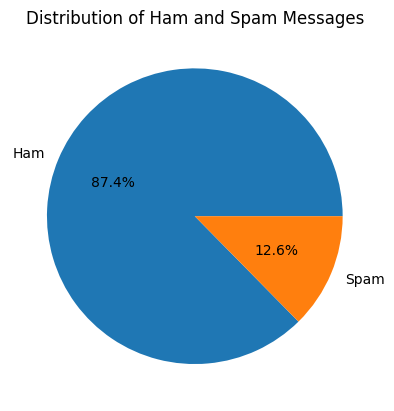

In [19]:
import matplotlib.pyplot as plt
plt.pie(spam['target'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%')
plt.title('Distribution of Ham and Spam Messages')
plt.show()

In [20]:
#Data is impblance

In [21]:
import nltk
from nltk.tokenize import word_tokenize

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
spam['num_characters'] = spam['text'].apply(len)

In [24]:
spam['num_words'] = spam['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
spam.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# num of words
spam['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [27]:
spam['num_words'] = spam['text'].apply(lambda x: len(nltk.word_tokenize(x)))
spam['num_charcter'] = spam['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
spam

,target,text,num_characters,num_words,num_charcter
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,15
5570,0,The guy did some bitching but I acted like i'd...,125,27,27


In [29]:
spam['num_sentences'] = spam['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
spam.head

<bound method NDFrame.head of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_charcter  num_sentences  
0                111         24            24              2  
1                 29          8        

In [31]:
spam.head()

,target,text,num_characters,num_words,num_charcter,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,2
1,0,Ok lar... Joking wif u oni...,29,8,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,2
3,0,U dun say so early hor... U c already then say...,49,13,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,1


In [32]:
spam[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#Ham messages statistics    
spam[spam['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
#Spam messages statistics
spam[spam['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

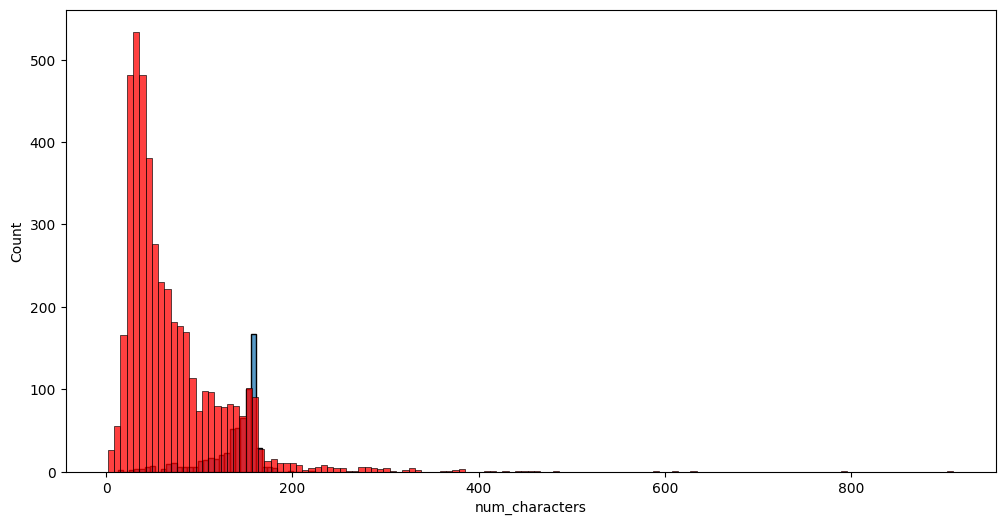

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(spam[spam['target'] == 1]['num_characters'])
sns.histplot(spam[spam['target'] == 0]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

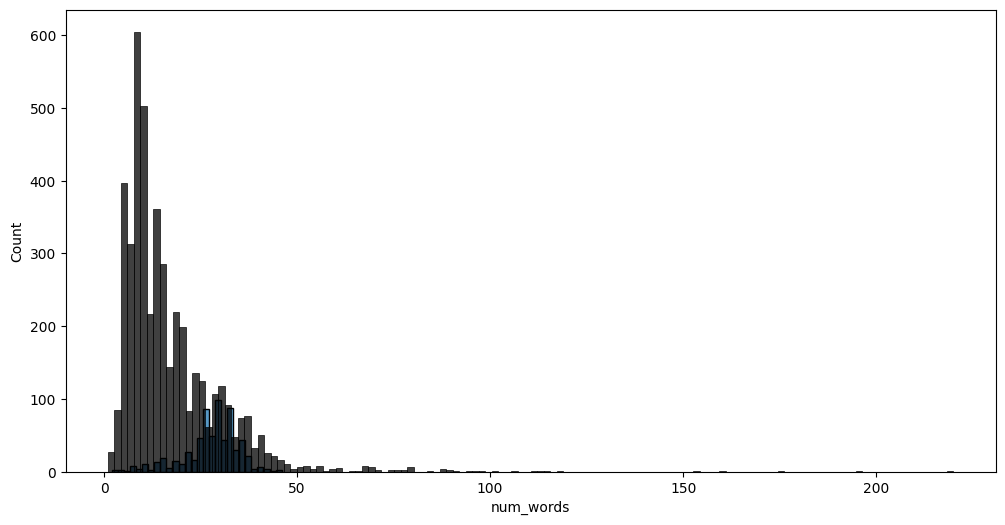

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(spam[spam['target'] == 1]['num_words'])
sns.histplot(spam[spam['target'] == 0]['num_words'], color='black')

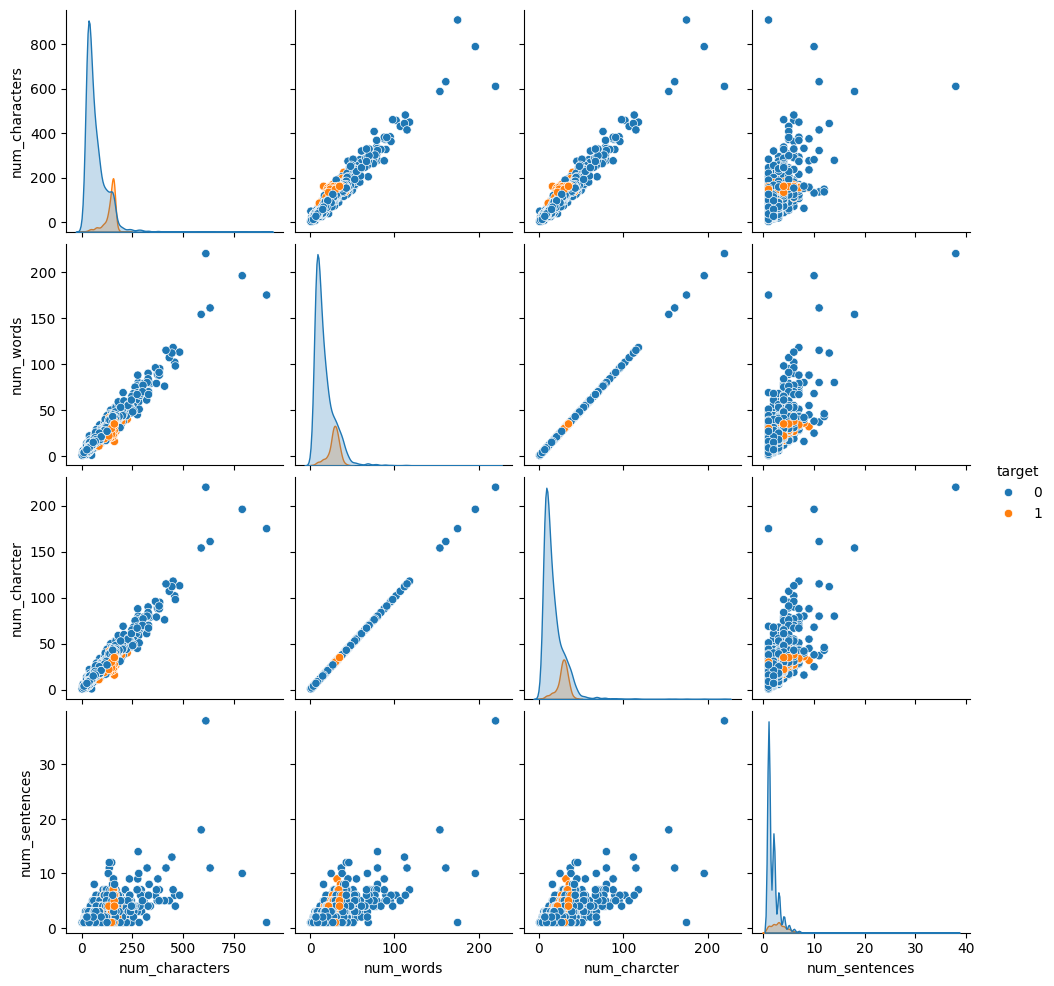

In [38]:
sns.pairplot(spam, hue='target')    

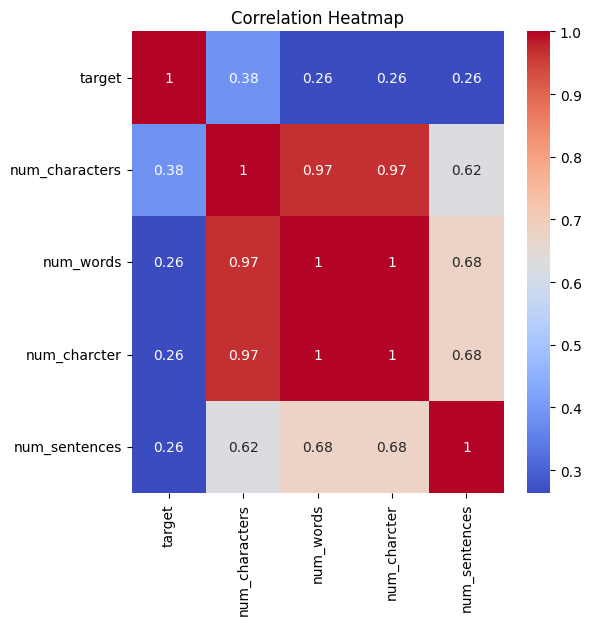

In [39]:
plt.figure(figsize=(6, 6))
sns.heatmap(spam.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# *3. Data Preprocessing*

In [40]:
# 1. Lowercase conversion
# 2. Tokenization
# 3. Removing special characters
# 4. Removing stop words and punctuation    
# 5. Stemming or Lemmatization

In [41]:
from nltk.tokenize import word_tokenize

In [42]:
def transform_text(text):
    text = text.lower()  # Lowercase conversion
    text = word_tokenize(text)  # Tokenization
    return text

In [43]:
transform_text('Hello World! This is a test %%% message.')

['hello',
 'world',
 '!',
 'this',
 'is',
 'a',
 'test',
 '%',
 '%',
 '%',
 'message',
 '.']

In [44]:
#remove special characters
def transform_text(text):
    text = text.lower()  
    text = word_tokenize(text)  

    y = [ ]
    for i in text:
        if i.isalnum():
            y.append(i) 

    return y

In [45]:
transform_text('Hello World! This is a test %%% message.')

['hello', 'world', 'this', 'is', 'a', 'test', 'message']

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [47]:
#To see punctuation marks
import string
string.punctuation  

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    """
    Transform text using the same preprocessing steps as in model training
    """
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize
    text = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y.clear()
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y.copy()
    y.clear()
    
    # Apply stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [49]:
transform_text('Hello World! This is a test %%% the man is a big message.')

'hello world test man big messag'

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [51]:
spam['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [52]:
spam.head()

,target,text,num_characters,num_words,num_charcter,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,2
1,0,Ok lar... Joking wif u oni...,29,8,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,2
3,0,U dun say so early hor... U c already then say...,49,13,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,1


In [53]:
# Step 1: Apply and store the transformed text
spam['transformed_text'] = spam['text'].apply(transform_text)

In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=5000, height=5000, min_font_size=10, background_color='white')

In [55]:
spam_wc = wc.generate(spam[spam['target'] == 1]['transformed_text'].str.cat(sep=" "))

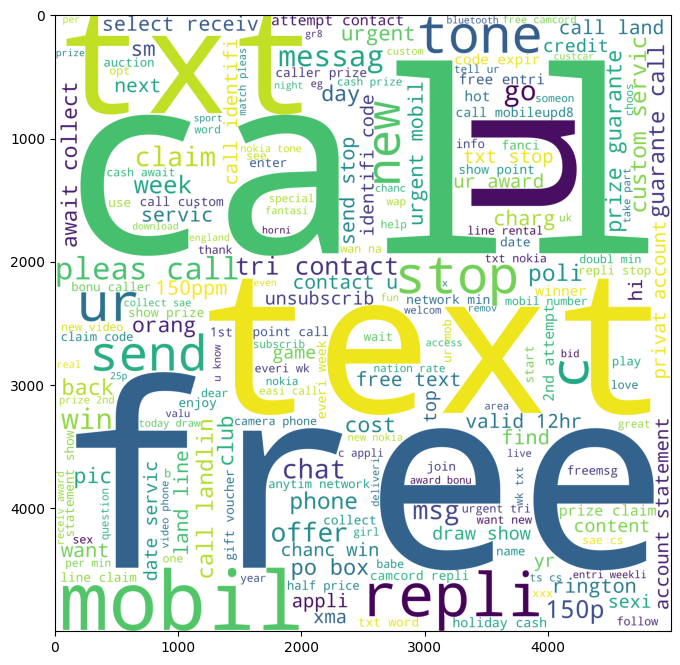

In [56]:
plt.figure(figsize=(16, 8))
plt.imshow(spam_wc)

In [57]:
# Generate word cloud for ham (target == 0)
ham_wc = wc.generate(spam[spam['target'] == 0]['transformed_text'].str.cat(sep=" "))

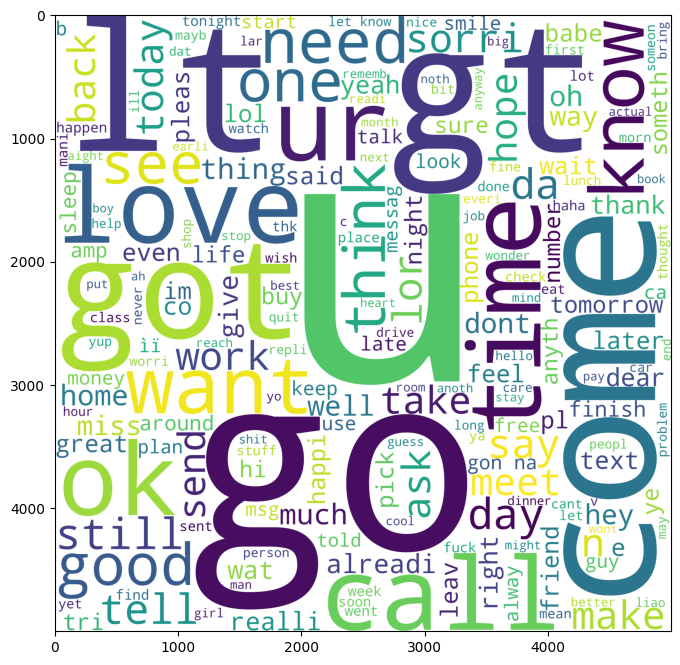

In [58]:
# Plot the result
plt.figure(figsize=(16, 8))
plt.imshow(ham_wc)


In [59]:
spam[spam['target'] == 1]

,target,text,num_characters,num_words,num_charcter,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,30,1,remind o2 get pound free call credit detail gr...


In [60]:
spam_corpus = []
for msg in spam[spam['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

9939

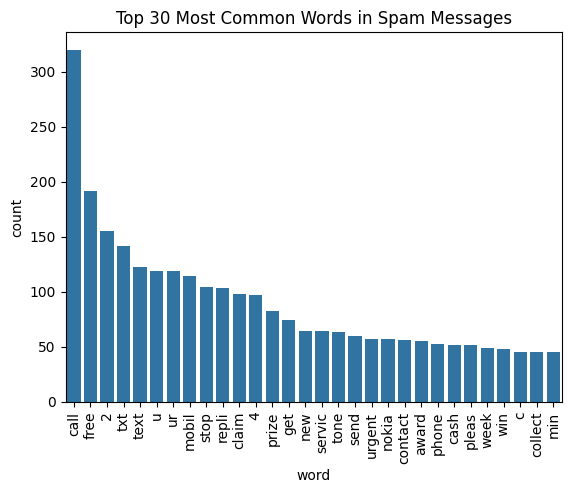

In [62]:
from collections import Counter
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_words)
plt.xticks(rotation=90)
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [63]:
# Create a list to store words from ham messages
ham_corpus = []

In [64]:
# Loop through ham messages and split words
for msg in spam[spam['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

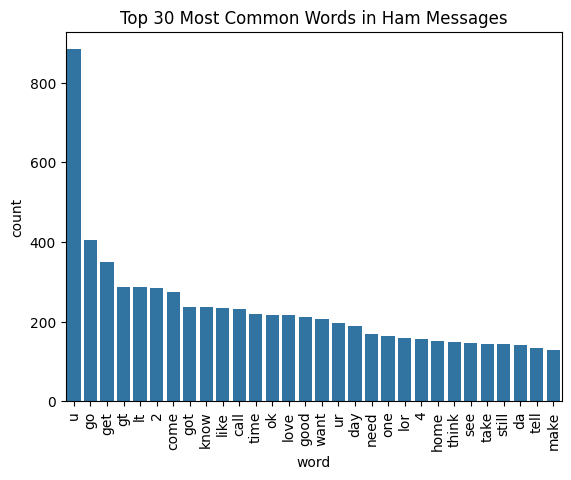

In [65]:
# Plot using seaborn
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

top_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_ham_words)
plt.xticks(rotation=90)
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()

# *4. Model Building*

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
# tfidf = TfidfVectorizer(max_features=3000)
tfidf = TfidfVectorizer()


In [67]:
X = tfidf.fit_transform(spam['transformed_text']).toarray()

In [68]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [69]:
# #appending the num_characters col to X
# X = np.hstack((X, spam[['num_characters']].values.reshape(-1, 1 )))

In [70]:
X.shape

(5169, 6708)

In [71]:
y = spam['target'].values

In [72]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [75]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()   
bnb = BernoulliNB()

In [77]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print("accuracy_score:",accuracy_score(y_test, y_pred1))
print( "confusion_matrix", confusion_matrix(y_test, y_pred1))
print("precision_score",precision_score(y_test, y_pred1))


accuracy_score: 0.8762088974854932
confusion_matrix [[793 103]
 [ 25 113]]
precision_score 0.5231481481481481


In [78]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print("accuracy_score:",accuracy_score(y_test, y_pred2))
print( "confusion_matrix", confusion_matrix(y_test, y_pred2))
print("precision_score",precision_score(y_test, y_pred2))

accuracy_score: 0.9593810444874274
confusion_matrix [[896   0]
 [ 42  96]]
precision_score 1.0


In [79]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision Score:", precision_score(y_test, y_pred3))

Accuracy Score: 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision Score: 0.9734513274336283


In [80]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))

Accuracy: 0.9748549323017408
Confusion Matrix:
 [[895   1]
 [ 25 113]]
Precision Score: 0.9912280701754386


In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))  

Accuracy: 0.9477756286266924
Confusion Matrix:
 [[895   1]
 [ 53  85]]
Precision Score: 0.9883720930232558


In [82]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))


d:\5th SEM\ML Project\SPAM\vit\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:29:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9729206963249516
Confusion Matrix:
 [[887   9]
 [ 19 119]]
Precision Score: 0.9296875


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2) 
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [85]:
clfs = {
    'SVC' : svc,
    'KNeighborsClassifier' : knc,   
    'MultinomialNB' : mnb,
    'DecisionTreeClassifier' : dtc,
    'LogisticRegression' : lrc,
    'RandomForestClassifier' : rfc,
    'AdaBoostClassifier' : abc,
    'BaggingClassifier' : bc,
    'ExtraTreesClassifier' : etc,
    'GradientBoostingClassifier' : gbdt,
    'XGBClassifier' : xgb
}

In [86]:
for i in clfs.items():
    print(i[0])

SVC
KNeighborsClassifier
MultinomialNB
DecisionTreeClassifier
LogisticRegression
RandomForestClassifier
AdaBoostClassifier
BaggingClassifier
ExtraTreesClassifier
GradientBoostingClassifier
XGBClassifier


In [87]:
type(x_test)

numpy.ndarray

In [88]:
def train_classifier(clf,x_train, y_train,x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision


In [89]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [90]:
def train_model_and_evaluate(clfs, x_train, y_train, x_test, y_test):
    accuracy_scores = []
    precision_scores = []
    for name, clf in clfs.items():
        current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
        print("For", name)
        print("Accuracy:", current_accuracy)
        print("Precision:", current_precision)
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
        print(f"{name} - Accuracy: {current_accuracy}, Precision: {current_precision}")
    return accuracy_scores, precision_scores


In [91]:
train_model_and_evaluate(clfs, x_train, y_train, x_test, y_test)

For SVC
Accuracy: 0.9729206963249516
Precision: 0.9741379310344828
SVC - Accuracy: 0.9729206963249516, Precision: 0.9741379310344828
For KNeighborsClassifier
Accuracy: 0.9003868471953579
Precision: 1.0
KNeighborsClassifier - Accuracy: 0.9003868471953579, Precision: 1.0
For MultinomialNB
Accuracy: 0.9593810444874274
Precision: 1.0
MultinomialNB - Accuracy: 0.9593810444874274, Precision: 1.0
For DecisionTreeClassifier
Accuracy: 0.9361702127659575
Precision: 0.8461538461538461
DecisionTreeClassifier - Accuracy: 0.9361702127659575, Precision: 0.8461538461538461
For LogisticRegression
Accuracy: 0.9516441005802708
Precision: 0.94
LogisticRegression - Accuracy: 0.9516441005802708, Precision: 0.94
For RandomForestClassifier
Accuracy: 0.971953578336557
Precision: 1.0
RandomForestClassifier - Accuracy: 0.971953578336557, Precision: 1.0
For AdaBoostClassifier
Accuracy: 0.9245647969052224
Precision: 0.8409090909090909
AdaBoostClassifier - Accuracy: 0.9245647969052224, Precision: 0.8409090909090909

d:\5th SEM\ML Project\SPAM\vit\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:34:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


For XGBClassifier
Accuracy: 0.9729206963249516
Precision: 0.9296875
XGBClassifier - Accuracy: 0.9729206963249516, Precision: 0.9296875


([0.9729206963249516,
  0.9003868471953579,
  0.9593810444874274,
  0.9361702127659575,
  0.9516441005802708,
  0.971953578336557,
  0.9245647969052224,
  0.9584139264990329,
  0.9729206963249516,
  0.9526112185686654,
  0.9729206963249516],
 [0.9741379310344828,
  1.0,
  1.0,
  0.8461538461538461,
  0.94,
  1.0,
  0.8409090909090909,
  0.8625954198473282,
  0.9824561403508771,
  0.9238095238095239,
  0.9296875])

In [92]:
# Assuming you already ran the training loop:
accuracy_list = []  
precision_list = []  

for name, classifier in clfs.items():
    current_accuracy, current_precision = train_classifier(classifier, x_train, y_train, x_test, y_test)
    accuracy_list.append(current_accuracy)
    precision_list.append(current_precision)

# Now create the DataFrame
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()), 
    'Accuracy': accuracy_list,       
    'Precision': precision_list     
})

# Sort by Accuracy (best first)
performance_df.sort_values(by='Accuracy', ascending=False, inplace=True)
performance_df.reset_index(drop=True, inplace=True)  

print(performance_df)

d:\5th SEM\ML Project\SPAM\vit\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:38:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                     Algorithm  Accuracy  Precision
0                          SVC  0.972921   0.974138
1         ExtraTreesClassifier  0.972921   0.982456
2                XGBClassifier  0.972921   0.929688
3       RandomForestClassifier  0.971954   1.000000
4                MultinomialNB  0.959381   1.000000
5            BaggingClassifier  0.958414   0.862595
6   GradientBoostingClassifier  0.952611   0.923810
7           LogisticRegression  0.951644   0.940000
8       DecisionTreeClassifier  0.935203   0.838095
9           AdaBoostClassifier  0.924565   0.840909
10        KNeighborsClassifier  0.900387   1.000000


In [93]:
accuracy_score_max_3000 = performance_df['Accuracy'].max()
precision_score_max_3000 = performance_df['Precision'].max()
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:

# Now create the DataFrame
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()), 
    'Accuracy': accuracy_list,       
    'Precision': precision_list     
})

# Sort by Accuracy (best first)
performance_df.sort_values(by='Accuracy', ascending=False, inplace=True)
performance_df.reset_index(drop=True, inplace=True)  

print(performance_df)

                     Algorithm  Accuracy  Precision
0                          SVC  0.972921   0.974138
1         ExtraTreesClassifier  0.972921   0.982456
2                XGBClassifier  0.972921   0.929688
3       RandomForestClassifier  0.971954   1.000000
4                MultinomialNB  0.959381   1.000000
5            BaggingClassifier  0.958414   0.862595
6   GradientBoostingClassifier  0.952611   0.923810
7           LogisticRegression  0.951644   0.940000
8       DecisionTreeClassifier  0.935203   0.838095
9           AdaBoostClassifier  0.924565   0.840909
10        KNeighborsClassifier  0.900387   1.000000


In [95]:
# Now create the DataFrame
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:len(accuracy_list)], 
    'Accuracy': accuracy_list,       
    'Precision': precision_list     
})


# Sort by Accuracy in ASCENDING order (lowest to highest)
performance_df.sort_values(by='Accuracy', ascending=False, inplace=True)

In [96]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
8,ExtraTreesClassifier,0.972921,0.982456
10,XGBClassifier,0.972921,0.929688
5,RandomForestClassifier,0.971954,1.000000
2,MultinomialNB,0.959381,1.000000
7,BaggingClassifier,0.958414,0.862595
9,GradientBoostingClassifier,0.952611,0.923810
4,LogisticRegression,0.951644,0.940000
3,DecisionTreeClassifier,0.935203,0.838095
6,AdaBoostClassifier,0.924565,0.840909


In [97]:
performance_df.sort_values(by='Accuracy', ascending=False)

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
8,ExtraTreesClassifier,0.972921,0.982456
10,XGBClassifier,0.972921,0.929688
5,RandomForestClassifier,0.971954,1.000000
2,MultinomialNB,0.959381,1.000000
7,BaggingClassifier,0.958414,0.862595
9,GradientBoostingClassifier,0.952611,0.923810
4,LogisticRegression,0.951644,0.940000
3,DecisionTreeClassifier,0.935203,0.838095
6,AdaBoostClassifier,0.924565,0.840909


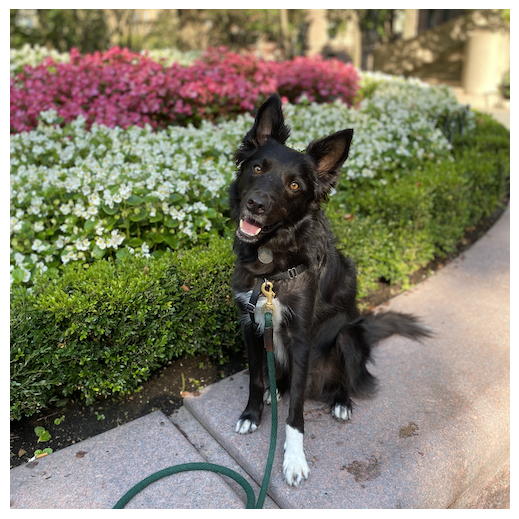

In [98]:
sns.dogplot()

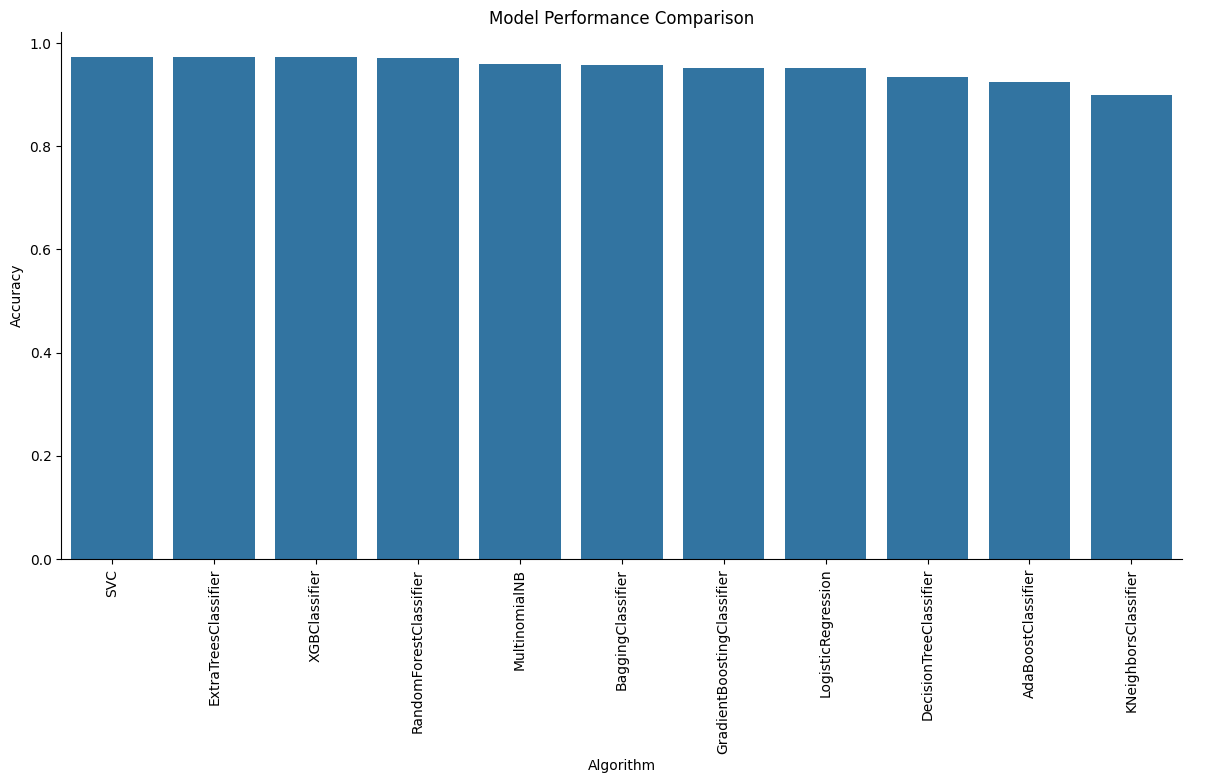

In [99]:
sns.catplot(x = 'Algorithm', y = 'Accuracy', data = performance_df, kind = 'bar', height = 6, aspect = 2)
plt.xticks(rotation=90)
plt.title('Model Performance Comparison')   
plt.show()

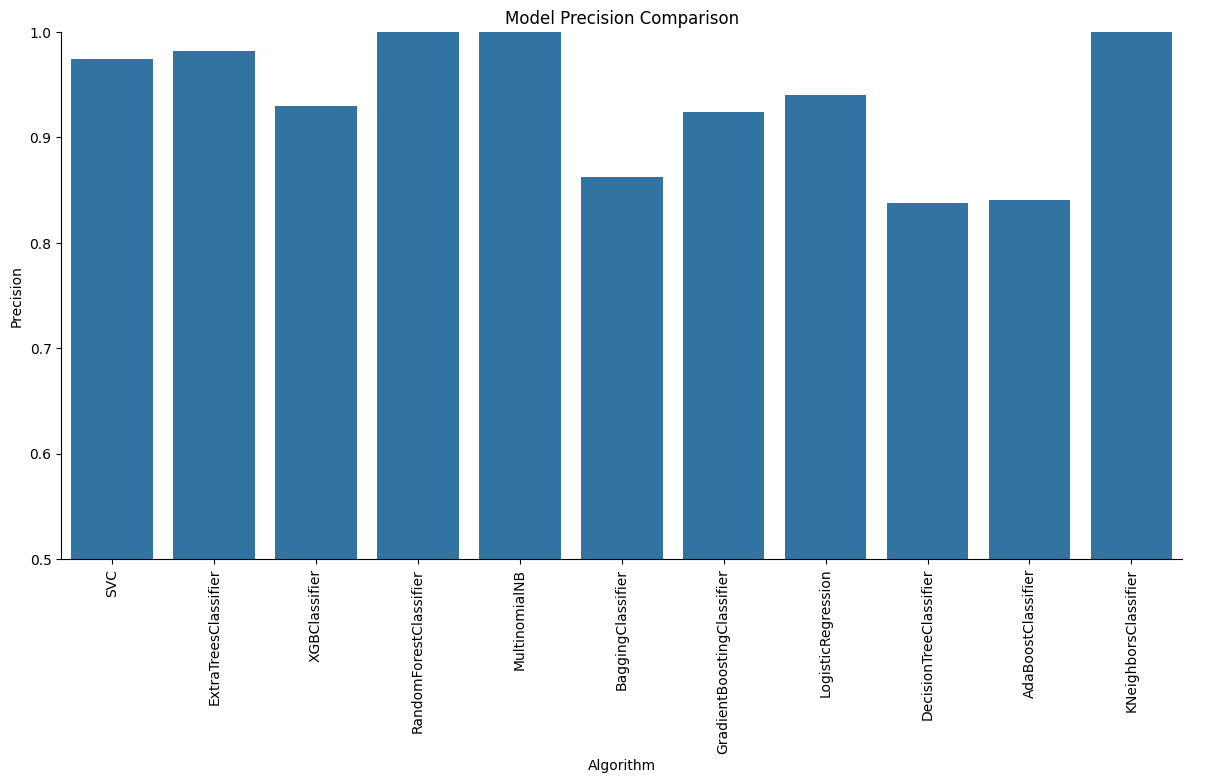

In [100]:
sns.catplot(x = 'Algorithm', y = 'Precision', data = performance_df, kind = 'bar', height = 6, aspect = 2)
plt.xticks(rotation=90)
plt.title('Model Precision Comparison')
plt.ylim(0.5, 1.0)
plt.show()

# *Model improving*

In [101]:
#changing the max_features parameter in TfidfVectorizer

In [102]:
#Appling Stacking
estimators = [('svc', svc), ('mnb', mnb), ('rfc', rfc)]
final_model = SVC(kernel='sigmoid', gamma=1.0)

In [103]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_model)

In [104]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_model)

In [105]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))



Accuracy: 0.9738878143133463
Precision: 0.9051094890510949


In [ ]:
import pickle
pickle.dump(tfidf, open('Vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('spam_classifier_model.pkl', 'wb'))